<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Ejemplos módulo Spectrum
#### Mariano Llamedo


En este NB ejemplificamos el uso de las herramientas para la estimación de la densidad espectral de potencia (PSD). Para una referencia teórica de cada método aplicado en este NB puede consultarse el **capítulo 8** del libro *Statistical Digital Signal Processing and Modeling* de **Monson Hayes**.

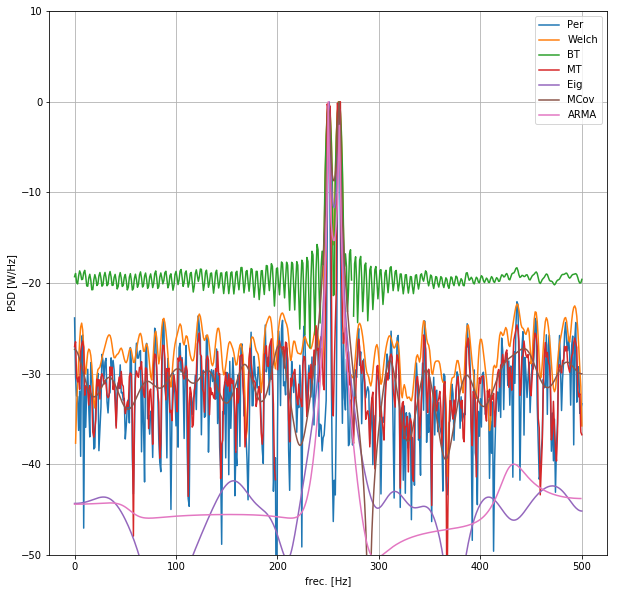

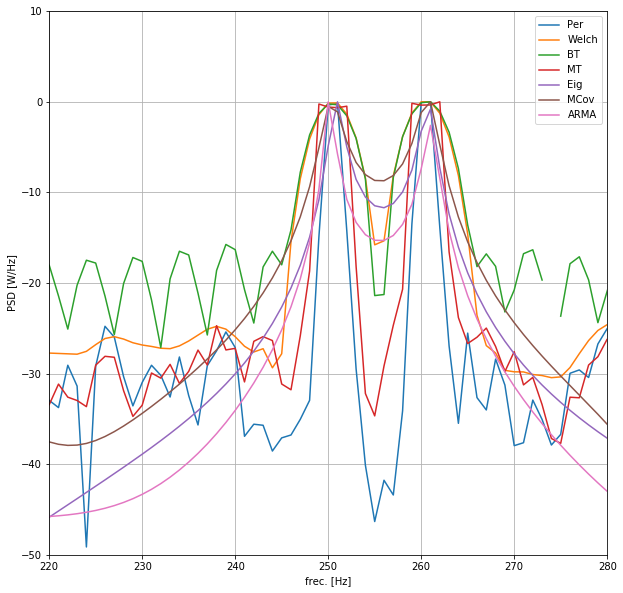

In [2]:
# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib as mpl
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (10,10)

import scipy.signal as sg
import matplotlib as mpl
import matplotlib.pyplot as plt
import spectrum as sp


def normalize(d):
    # d is a (n x dimension) np array
    d -= np.min(d, axis=0)
    d /= np.ptp(d, axis=0)
    return d

    
fs = 1000.0 # frecuencia de muestreo (Hz)
N = 1000   # cantidad de muestras
df = fs/N # resolución espectral
eps = np.finfo(float).tiny

# grilla de sampleo temporal
tt = np.linspace(0, (N-1)/fs, N).flatten()

dd = 0.5

# prestar atención que las tuplas dentro de los diccionarios también pueden direccionarse mediante "ii"
#data = np.sin( 2*np.pi*(N/4+dd)*df*tt) + np.sqrt(0.1)*np.random.randn(N)
data = np.sin( 2*np.pi*(N/4+dd)*df*tt) + np.sin( 2*np.pi*(N/4+10+dd)*df*tt) + np.sqrt(0.1)*np.random.randn(N)


# No paramétricos
pP = sp.Periodogram(data, sampling=fs, NFFT = N )
_, pW = sg.welch(data, fs=fs, nfft=N, window='hanning', nperseg=int(np.round(N/3)) )
pBT = sp.pcorrelogram(data, sampling=fs, NFFT = N, lag=int(np.round(N/5)), window='hamming')
pMT = sp.MultiTapering(data, sampling=fs, NFFT = N, NW=2 )

# Paramétricos

pEig = sp.pev(data, 30, NFFT=N )

pCov = sp.pmodcovar(data, 30, NFFT = N )

pARMA = sp.parma(data, 8, 8, 30, NFFT=N)


sp.pma

description = ['Per', 'Welch', 'BT', 'MT', 'Eig', 'MCov', 'ARMA' ]

# Una forma de representación de las PSD's incluida en el módulo Spectrum
#pP.plot()
#pBT.plot()
#pW[1].plot()


# grilla de sampleo frecuencial
ff = np.linspace(0, (N-1)*df, N).flatten()

plt.figure(1)
plt.clf()

#psds = 10*np.log10( np.transpose(np.vstack([ pP.psd, pW, pBT.psd ])))
psds = 10*np.log10( np.transpose(np.vstack([ normalize(pP.psd), normalize(pW), normalize(pBT.psd), normalize(pMT.psd), normalize(pEig.psd), normalize(pCov.psd), normalize(pARMA.psd) ])))

line_hdls = plt.plot(ff[0:int(N/2+1)], psds )
plt.xlabel('frec. [Hz]')
plt.ylabel('PSD [W/Hz]')
plt.grid(which='both', axis='both')
plt.ylim([-50, 10])

# presentar una leyenda para cada tipo de señal
axes_hdl = plt.gca()

# este tipo de sintaxis es *MUY* de Python
axes_hdl.legend(line_hdls, description, loc='upper right'  )


plt.figure(2)
plt.clf()

line_hdls = plt.plot(ff[0:int(N/2+1)], psds )
plt.xlabel('frec. [Hz]')
plt.ylabel('PSD [W/Hz]')
plt.grid(which='both', axis='both')

plt.xlim((N/4 +np.array([-30, 30]))*df)
plt.ylim([-50, 10])
        
# presentar una leyenda para cada tipo de señal
axes_hdl = plt.gca()

# este tipo de sintaxis es *MUY* de Python
axes_hdl.legend(line_hdls, description, loc='upper right'  )

plt.show()

    